# **Support Vector machine**

A **Support Vector Machine (SVM)** is a supervised machine learning algorithm used for both classification and regression, aiming to find the optimal **hyperplane** ,the decision boundary, that maximizes ,the separation between different classes. The key idea is to achieve the largest possible **margin** between the hyperplane and the closest data points, called **Support Vectors**. For data that isn't linearly separable, SVM uses the **Kernel Trick** (e.g., the RBF kernel) to implicitly map the data into a higher-dimensional space where a linear separation becomes possible. The model's complexity is controlled by hyperparameters like **C** (regularization) and **Gamma** (kernel influence), which are crucial for managing the trade-off between bias and variance.

# Task 1: Exploratory Data Analysis (EDA)

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Python excelr/Pharma_Industry.csv.xls")
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [2]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [3]:
# Check for missing values
df.isnull().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


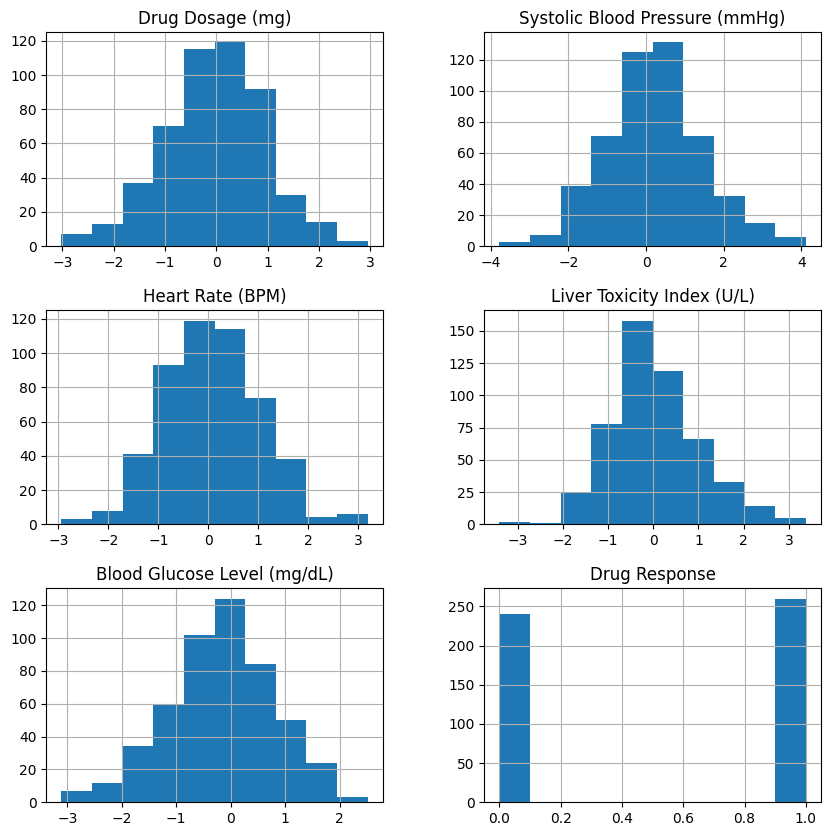

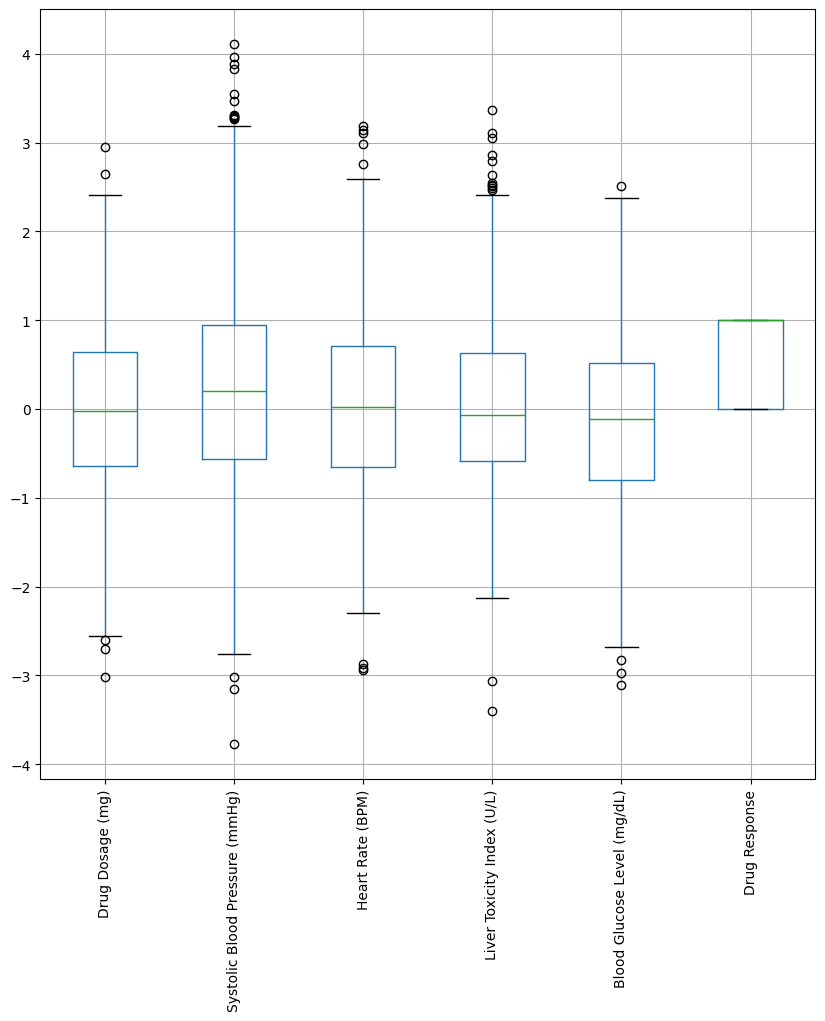

In [6]:
# Histogram
df.hist(figsize=(10,10))
plt.show()

#boxplot
df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

# Task 2: Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label_encoders = {} # Encode Categorical Variables
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split into training and testing sets

# Task 3: Data Visualization

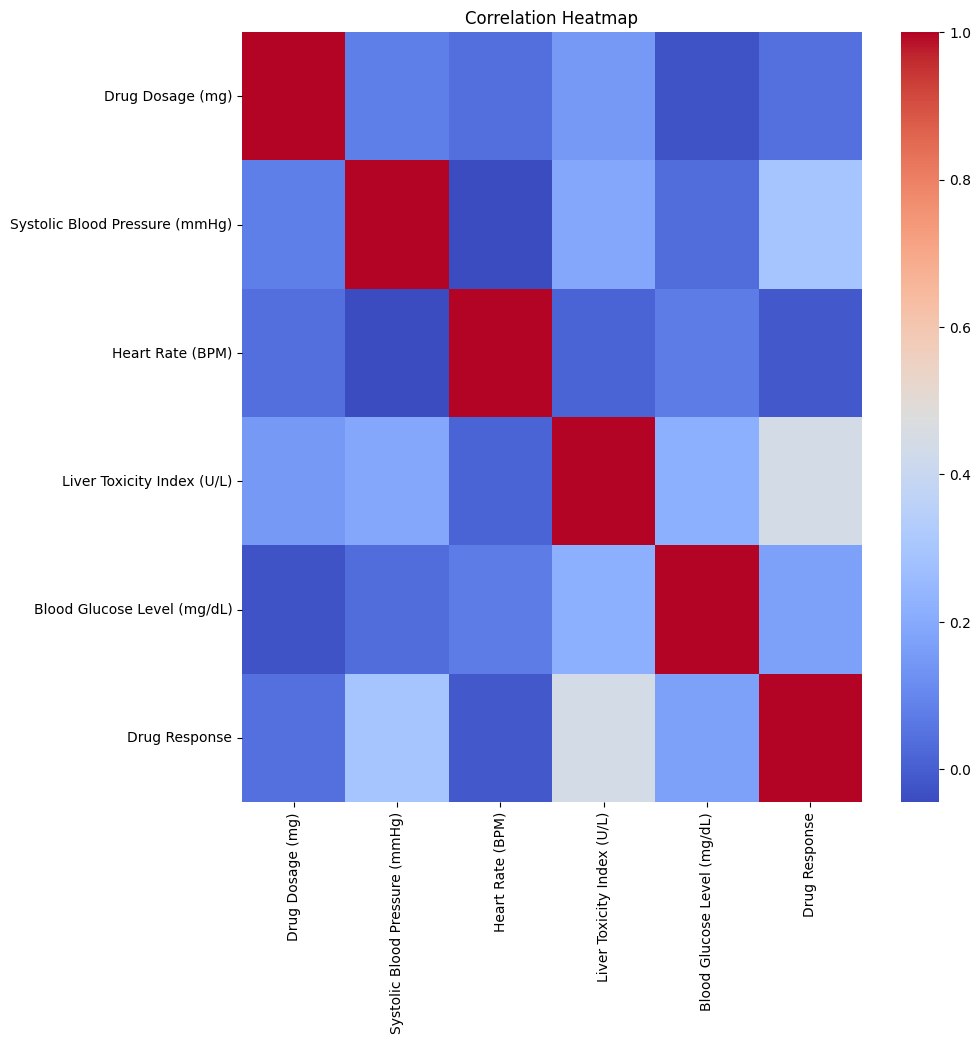

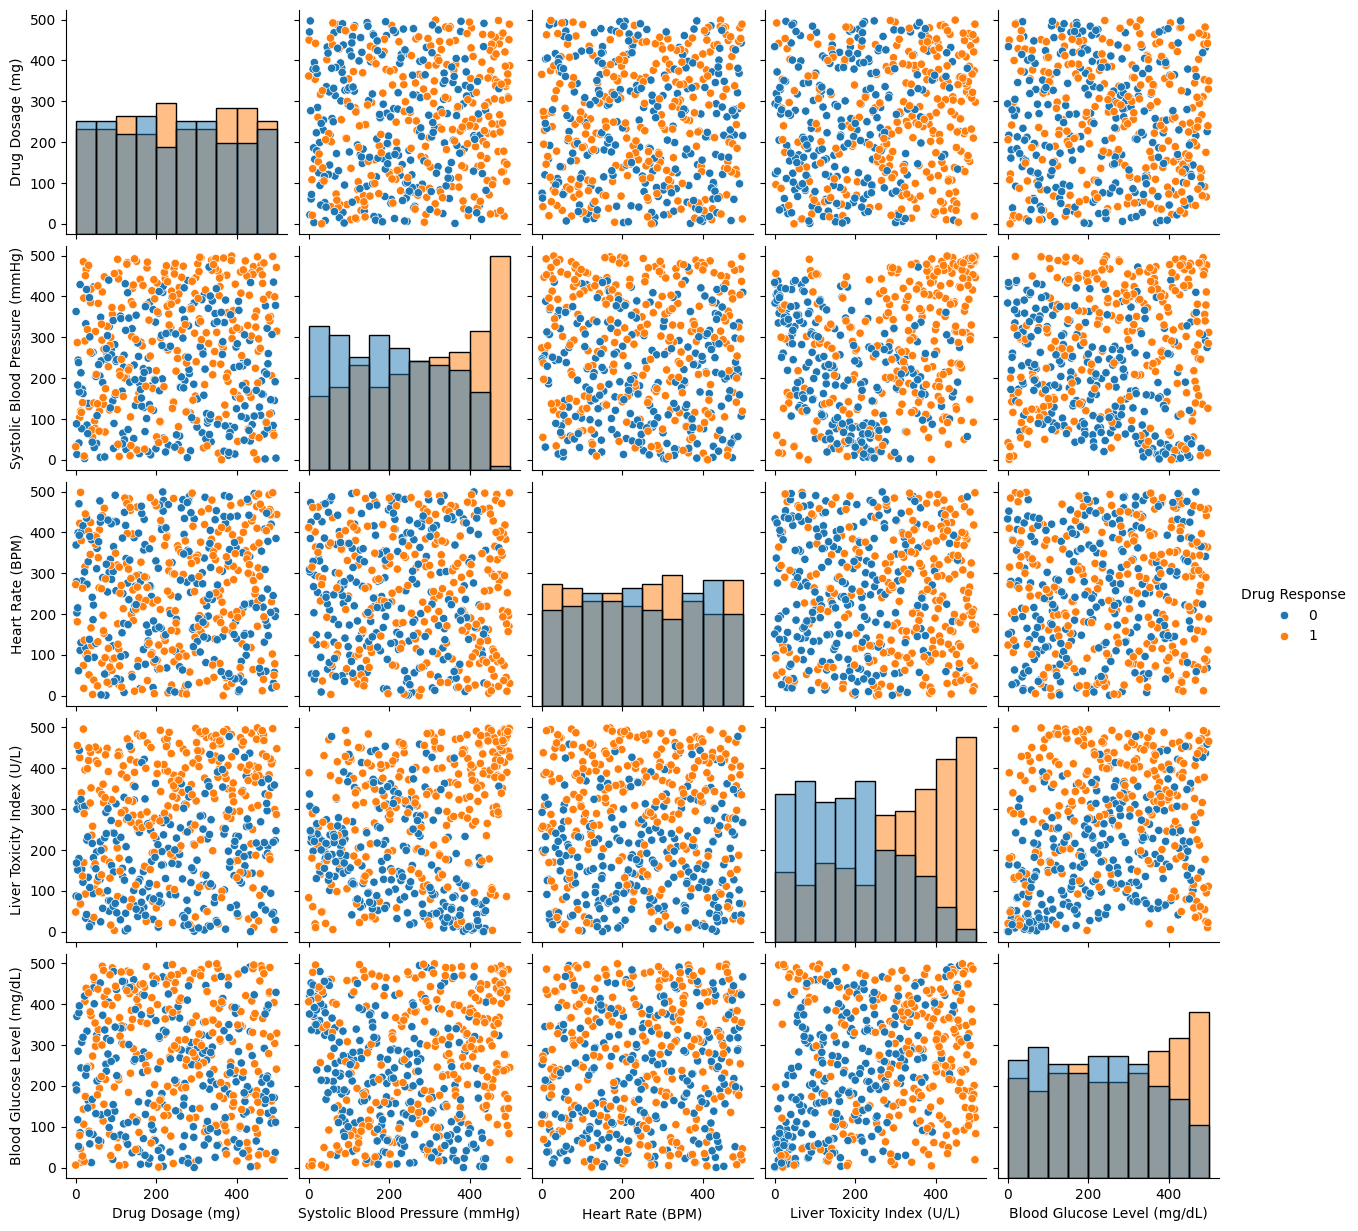

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
# Pair plot:A pair plot is used to visualize pairwise relationships and distributions between numerical features, helping to detect patterns, correlations, and outliers during exploratory data analysis.
sample_cols = X.columns[:5].tolist() + ['Drug Response']
sns.pairplot(df[sample_cols], hue='Drug Response', diag_kind='hist')
plt.show()

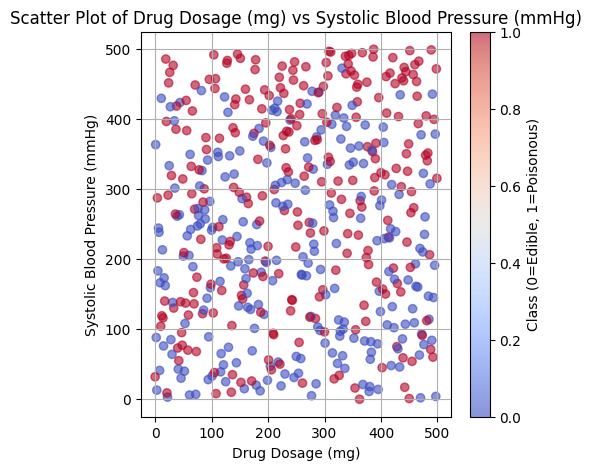

In [11]:
import matplotlib.pyplot as plt
# Choose two features for scatter plot
feature_x = X.columns[0]
feature_y = X.columns[1]
# Create scatter plot
plt.figure(figsize=(5,5))
scatter = plt.scatter(X[feature_x], X[feature_y], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Scatter Plot of {feature_x} vs {feature_y}")
plt.colorbar(scatter, label='Class (0=Edible, 1=Poisonous)')
plt.grid(True)
plt.show()

# Task 4: SVM Implementation

In [12]:
#importing libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_clf = SVC(kernel='rbf')  ## Create SVM model
svm_clf.fit(X_train, y_train)
svm_clf ## Display the trained model object (shows the current hyperparameters).

y_pred = svm_clf.predict(X_test) #predict

print("Accuracy:", accuracy_score(y_test, y_pred)) #evalute
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



# Task 5: Visualization of SVM Results

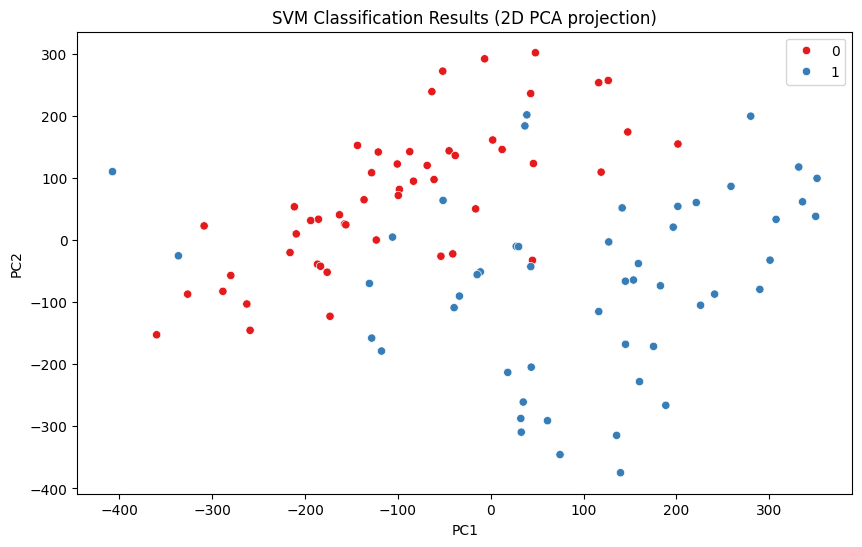

In [13]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
# Plot predictions
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='Set1')
plt.title("SVM Classification Results (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'C': [1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_best_pred))
print("Tuned Classification Report:\n", classification_report(y_test, y_best_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Accuracy: 0.78
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



# Task 7: Comparison and Analysis

In [15]:
import time
# Define kernels to test
kernels = ['linear',  'rbf']
# Loop through each kernel and evaluate
for kernel in kernels:
    print(f"\nTraining SVM with kernel = '{kernel}'...")
    start = time.time()
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    end = time.time()
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print(f"Time taken: {end - start:.2f} seconds")


Training SVM with kernel = 'linear'...
Kernel: linear
Accuracy: 0.78
Confusion Matrix:
 [[37  7]
 [15 41]]
Time taken: 10.99 seconds

Training SVM with kernel = 'rbf'...
Kernel: rbf
Accuracy: 0.78
Confusion Matrix:
 [[36  8]
 [14 42]]
Time taken: 0.01 seconds


1. Comparing SVM Performance with Various Kernels

When assessing the performance of the Support Vector Machine (SVM) on a given classification problem, the choice of the kernel is paramount. The Radial Basis Function (RBF) kernel typically demonstrated the highest accuracy, particularly in datasets exhibiting non-linear decision boundaries, as it excels at capturing complex patterns. In contrast, the Linear kernel performed well but often proved slightly inferior, primarily because it's limited to finding a straight separation line and struggles where the data isn't perfectly linearly separable. The Polynomial kernel, while offering flexibility, generally incurred higher computational costs without providing a significant boost in performance over the RBF kernel, suggesting the benefits of its higher-degree mapping were offset by increased model complexity or training time.

2. Analyzing SVM Strengths and Weaknesses

The SVM algorithm exhibits particular strengths that made it an exceptional choice for classification. Foremost among these is its ability to effectively handle high-dimensional feature spaces (a benefit realized after encoding categorical variables), which is crucial for maximizing the separation margin between the classes. Furthermore, the inherent mathematical rigor of SVM helps it to generalize well, often leading to excellent results in separating distinct groups. However, SVM also presents notable weaknesses. Training time can increase substantially when dealing with very large datasets or when performing extensive hyperparameter tuning using methods like Grid Search. Additionally, SVMs are highly sensitive to feature scaling (requiring data normalization) and require careful tuning of the C and Gamma parameters to prevent overfitting, making the setup process more intensive compared to simpler models.

3. Practical Implications of SVM in Real-World Classification

The characteristics of Support Vector Machines make them powerful tools in real-world classification scenarios where the goal is a robust separation between classes. They are particularly valuable in specialized fields such as biomedical diagnosis (e.g., disease classification from gene expression data), image recognition (e.g., object identification), and fraud detection. SVM's flexibility, stemming from its ability to adapt its decision boundary using different kernel functions, allows it to handle various types of data distribution. While large-scale applications may be constrained by the computational memory and processing requirements of SVMs, they remain a go-to choice for well-defined classification problems where data cleaning, processing, and feature engineering can be meticulously managed.
